# Backtesting of Contrarian & Momentum Trading Strategies with multiple stocks

__Objectives:__

- Simulate the Strategy with historical data and measure the performance.

__Possible Backtesting Outcomes__:
- low/no profitability -> __Reject Strategy__
- moderate/high profitability -> __further analysis__ (reliability of profits)

__Next Steps__:
- Implementation/Testing with Paper Trading Account
- Live Trading (& monitoring)

__Description:__

1. At the end of each trading day, you __buy__ the __three worst performing stocks__ among the __30 DJIA__ stocks and hold them for the next trading day.

2. At the end of each trading day, you __short sell__ the __three best performing stocks__ among the __30 DJIA__ stocks and short them for the next trading day.

3. For simplicity reasons, you buy/sell __one share__ of the respective stocks.

4. Underlying idea: The __Market overreacted__ and most recent (extreme) price __trends will revert__ in the near future -> __Contrarian Trading__ (!= Momentum Trading)



__Key Learnings__

1. Contratian Strategy of buying the worst performing stocks of the DJI failed terribly.
2. Pivoted to Momentum Strategy, buing the best performing stocks of the DJI!!!
3. Outperformed the market

## Getting Started

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM',
       'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT',
       '^DJI']
df = yf.download(symbol, start, end ).Close
close

[*********************100%%**********************]  31 of 31 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,101.59,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,101.89,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,97.96,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58


In [24]:
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,101.59,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,101.89,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,97.96,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58


In [28]:
close

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,134.87,289.65,145.86,168.74,225.54,142.06,43.91,177.93,86.75,47.68,...,101.59,224.51,92.10,136.48,182.15,540.66,193.93,37.62,36.89,139.47
2022-11-10,146.87,291.01,154.75,177.58,232.45,156.30,45.66,181.30,90.46,49.96,...,101.89,242.98,99.49,141.18,183.30,544.17,205.57,38.52,38.49,142.36
2022-11-11,149.70,285.02,154.89,177.49,236.49,157.73,44.79,186.46,95.01,53.14,...,97.96,247.11,106.09,140.97,181.73,522.08,205.00,38.30,41.26,142.58


In [30]:
returns = close.pct_change()
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,-0.01,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.03,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.02,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.00,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,0.00,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.00,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,-0.04,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00


## Determine daily Trading Positions

- __Buying__ the three worst-performing stocks -> long position (__+1__) <br>
- __Short-Selling__ the three best-perfroming stocks -> short position (__-1__)
- all other stocks: no/__neutral__ position (__0__)

In [35]:
best_worst = 3

In [37]:
number_of_shares = 1

In [39]:
returns

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,-0.01,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.03,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.02,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.00,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.03,-0.01,-0.03,-0.01,-0.02,-0.03,-0.02,-0.04,-0.13,-0.04,...,0.00,-0.02,-0.02,-0.00,-0.01,-0.02,-0.04,-0.01,-0.04,-0.02
2022-11-10,0.09,0.00,0.06,0.05,0.03,0.10,0.04,0.02,0.04,0.05,...,0.00,0.08,0.08,0.03,0.01,0.01,0.06,0.02,0.04,0.02
2022-11-11,0.02,-0.02,0.00,-0.00,0.02,0.01,-0.02,0.03,0.05,0.06,...,-0.04,0.02,0.07,-0.00,-0.01,-0.04,-0.00,-0.01,0.07,0.00


In [41]:
returns.iloc[1].nlargest(best_worst)#.index # getting the best 3 stocks in second row

WMT    0.06
DOW    0.05
AAPL   0.04
Name: 2020-09-01 00:00:00, dtype: float64

In [43]:
returns.iloc[1].nsmallest(best_worst)#.index # getting the worst 3 stocks in second row

WBA   -0.03
JNJ   -0.01
TRV   -0.01
Name: 2020-09-01 00:00:00, dtype: float64

In [45]:
# function to be applied on all rows
def trading_positions(series):
    best_stocks = series.nlargest(best_worst).index
    worst_stocks = series.nsmallest(best_worst).index
    series[best_stocks] = -1 * number_of_shares # Short-Sell best stocks 
    series[worst_stocks] = 1 * number_of_shares # Buy worst stocks
    neutral = series.index.drop(best_stocks.append(worst_stocks))
    series[neutral] = 0 # all other stocks: neutral

In [47]:
positions = returns.copy()


In [49]:
positions.apply(trading_positions, axis = 1)

Date
2020-08-31    None
2020-09-01    None
2020-09-02    None
2020-09-03    None
2020-09-04    None
              ... 
2022-11-09    None
2022-11-10    None
2022-11-11    None
2022-11-14    None
2022-11-15    None
Length: 558, dtype: object

In [51]:
positions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2020-09-03,1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
2020-09-04,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,...,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-10,-1.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,1.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00


In [53]:
positions.iloc[0] = 0
positions.iloc[-1] = 0
positions.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2020-09-03,1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
2020-09-04,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [55]:
returns.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.04,-0.01,0.01,0.00,0.03,0.03,-0.00,-0.01,0.01,0.05,...,-0.01,0.01,0.03,-0.00,-0.01,0.00,0.01,-0.00,-0.03,0.06
2020-09-02,-0.02,0.03,0.02,0.02,0.02,-0.02,0.01,0.00,0.01,0.04,...,0.03,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.00
2020-09-03,-0.08,-0.04,0.00,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.02,...,-0.02,-0.06,-0.03,-0.02,-0.02,-0.01,-0.03,0.00,-0.00,-0.02
2020-09-04,0.00,0.00,0.01,0.01,0.01,-0.04,-0.00,-0.00,-0.01,0.00,...,-0.00,-0.01,-0.00,-0.00,0.01,-0.01,-0.02,-0.00,-0.01,-0.01


## Identify Trades

__Change in position -> trade__

In [60]:
positions

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2020-09-03,1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
2020-09-04,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,...,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-10,-1.00,1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,1.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00


In [62]:
trades = positions.diff().fillna(0)
trades

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-1.00,2.00
2020-09-03,0.00,0.00,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00
2020-09-04,-1.00,0.00,1.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,-1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,-1.00,0.00
2022-11-10,-1.00,1.00,0.00,0.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,...,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,1.00,-1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00


In [64]:
trades.sum(axis = 1) # zero daily net buys/sells 

Date
2020-08-31   0.00
2020-09-01   0.00
2020-09-02   0.00
2020-09-03   0.00
2020-09-04   0.00
             ... 
2022-11-09   0.00
2022-11-10   0.00
2022-11-11   0.00
2022-11-14   0.00
2022-11-15   0.00
Length: 558, dtype: float64

In [66]:
trades.sum().sum() #total buys == total sells 

0.0

In [68]:
abs(trades).sum(axis = 1) # traded shares per day

Date
2020-08-31    0.00
2020-09-01    6.00
2020-09-02   10.00
2020-09-03   10.00
2020-09-04   10.00
              ... 
2022-11-09    8.00
2022-11-10   12.00
2022-11-11   10.00
2022-11-14   12.00
2022-11-15    6.00
Length: 558, dtype: float64

In [70]:
(trades != 0).sum(axis = 1) # traded symbols per day


trades

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-1.00,2.00
2020-09-03,0.00,0.00,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00
2020-09-04,-1.00,0.00,1.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,-1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,-1.00,0.00
2022-11-10,-1.00,1.00,0.00,0.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,...,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,1.00,-1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00


## Performance Analysis - Profit and Loss (P&L)

- Long Position: __Profit__ (Loss) if Price __increases__ (decreases)
- Short Position: __Profit__ (Loss) if Price __decreases__ (increases) 

In [75]:
positions.head(5)


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2020-09-03,1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
2020-09-04,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [77]:
close.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83


In [79]:
close_diff = close.diff()
close_diff

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,5.14,-2.46,0.88,0.28,3.74,8.60,-0.19,-0.85,1.68,2.15,...,-0.80,1.74,2.95,-0.15,-1.35,0.28,1.36,-0.11,-1.26,8.74
2020-09-02,-2.78,7.26,1.93,2.68,3.22,-4.56,0.39,0.11,1.84,1.95,...,2.39,4.38,1.96,2.33,2.79,7.41,3.13,1.37,0.41,0.09
2020-09-03,-10.52,-10.21,0.06,-6.01,-2.51,-11.68,-1.47,-0.91,-2.15,-0.83,...,-1.37,-14.35,-3.95,-2.25,-2.13,-4.01,-7.52,0.08,-0.08,-3.14
2020-09-04,0.08,0.49,1.21,2.28,1.42,-10.31,-0.13,-0.35,-1.25,0.21,...,-0.24,-3.05,-0.45,-0.30,1.22,-4.23,-4.30,-0.13,-0.20,-1.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-4.63,-2.74,-4.34,-0.88,-4.27,-5.04,-0.70,-7.41,-13.15,-1.97,...,0.09,-4.36,-1.65,-0.33,-2.75,-12.39,-7.85,-0.25,-1.40,-3.32
2022-11-10,12.00,1.36,8.89,8.84,6.91,14.24,1.75,3.37,3.71,2.28,...,0.30,18.47,7.39,4.70,1.15,3.51,11.64,0.90,1.60,2.89
2022-11-11,2.83,-5.99,0.14,-0.09,4.04,1.43,-0.87,5.16,4.55,3.18,...,-3.93,4.13,6.60,-0.21,-1.57,-22.09,-0.57,-0.22,2.77,0.22


In [81]:
pandl = positions.shift() * close_diff
pandl

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
2020-09-02,2.78,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-1.95,...,0.00,0.00,0.00,0.00,2.79,0.00,0.00,0.00,0.41,-0.09
2020-09-03,-10.52,-0.00,0.00,-0.00,-0.00,-11.68,-0.00,-0.00,-0.00,0.83,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-3.14
2020-09-04,0.08,0.00,-1.21,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,-3.05,-0.00,-0.00,0.00,-0.00,-0.00,0.13,0.20,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.00,2.74,4.34,0.88,-0.00,-0.00,-0.00,-7.41,-13.15,-0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-1.40,-0.00
2022-11-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.37,3.71,2.28,...,-0.30,0.00,0.00,-4.70,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,-2.83,-5.99,0.00,-0.00,0.00,-1.43,-0.00,0.00,0.00,0.00,...,-3.93,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00


In [83]:
pandl.sum(axis = 1) # daily P&L

Date
2020-08-31     0.00
2020-09-01     0.00
2020-09-02     6.25
2020-09-03   -20.23
2020-09-04    -8.82
              ...  
2022-11-09   -14.00
2022-11-10     6.27
2022-11-11   -21.91
2022-11-14     0.33
2022-11-15    11.62
Length: 558, dtype: float64

In [85]:
pandl.sum(axis = 1).cumsum() # cumulative P&L

Date
2020-08-31      0.00
2020-09-01      0.00
2020-09-02      6.25
2020-09-03    -13.98
2020-09-04    -22.80
               ...  
2022-11-09   -386.61
2022-11-10   -380.34
2022-11-11   -402.25
2022-11-14   -401.92
2022-11-15   -390.30
Length: 558, dtype: float64

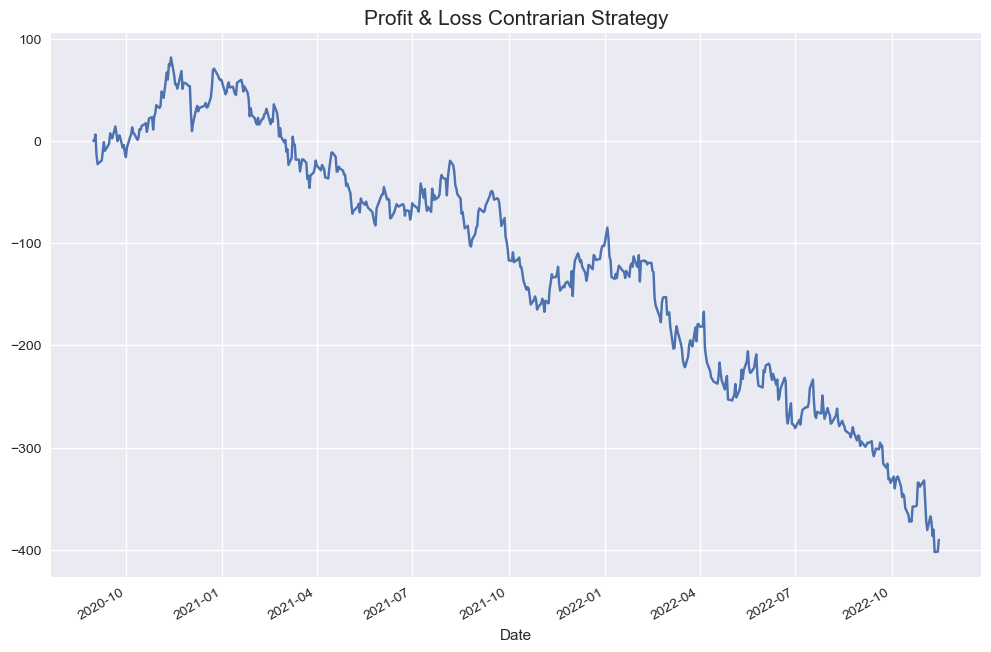

In [87]:
pandl.sum(axis = 1).cumsum().plot(figsize = (12, 8))
plt.title("Profit & Loss Contrarian Strategy", fontsize = 15)
plt.show()

-> Contrarian Strategy __not profitable__. Try the opposite Strategy (Momentum)?

## Performance Analysis - Cashflows

- (Short) Sale -> Cash Inflow (positive cf)
- Buy -> Cash Outflow (negative cf)

In [93]:
close.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.04,253.32,101.59,171.82,142.31,272.65,42.22,83.93,131.87,45.12,...,81.36,225.53,111.89,138.33,116.04,312.55,211.99,59.27,38.02,138.85
2020-09-01,134.18,250.86,102.47,172.10,146.05,281.25,42.03,83.08,133.55,47.27,...,80.56,227.27,114.84,138.18,114.69,312.83,213.35,59.16,36.76,147.59
2020-09-02,131.40,258.12,104.40,174.78,149.27,276.69,42.42,83.19,135.39,49.22,...,82.95,231.65,116.80,140.51,117.48,320.24,216.48,60.53,37.17,147.68
2020-09-03,120.88,247.91,104.46,168.77,146.76,265.01,40.95,82.28,133.24,48.39,...,81.57,217.30,112.85,138.26,115.35,316.23,208.96,60.61,37.09,144.54
2020-09-04,120.96,248.40,105.67,171.05,148.18,254.70,40.82,81.93,131.99,48.60,...,81.34,214.25,112.40,137.96,116.57,312.00,204.66,60.48,36.89,142.83


In [95]:
trades.head(5)

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-1.00,2.00
2020-09-03,0.00,0.00,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00
2020-09-04,-1.00,0.00,1.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,-1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00


In [97]:
cf = close.mul(trades).mul(-1) # buying means negative cf / selling means positive cf
cf

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2020-09-01,134.18,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,47.27,...,-0.00,-0.00,-0.00,-0.00,-114.69,-0.00,-0.00,-0.00,-36.76,147.59
2020-09-02,-262.80,-0.00,-0.00,-0.00,-0.00,-276.69,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,117.48,-0.00,-0.00,-0.00,37.17,-295.36
2020-09-03,-0.00,-0.00,104.46,-0.00,-0.00,265.01,-0.00,-0.00,-0.00,-48.39,...,-0.00,-217.30,-0.00,-0.00,-0.00,-0.00,-0.00,60.61,37.09,144.54
2020-09-04,120.96,-0.00,-105.67,171.05,-0.00,-254.70,-0.00,-0.00,-0.00,-0.00,...,-0.00,214.25,-0.00,-0.00,-0.00,-0.00,-204.66,-60.48,-36.89,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.00,-289.65,-145.86,-168.74,-0.00,-0.00,-0.00,-0.00,-0.00,-47.68,...,101.59,-0.00,-0.00,136.48,-0.00,-0.00,-0.00,-0.00,36.89,-0.00
2022-11-10,146.87,-291.01,-0.00,-0.00,-0.00,156.30,-0.00,181.30,90.46,49.96,...,-203.78,-0.00,-0.00,-141.18,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2022-11-11,-149.70,285.02,-0.00,-0.00,-0.00,-157.73,-0.00,-0.00,-0.00,53.14,...,-0.00,-0.00,106.09,-0.00,-0.00,-522.08,-0.00,-0.00,41.26,-0.00


In [99]:
cf_daily = cf.sum(axis = 1) # daily aggregated cashflows
cf_daily

Date
2020-08-31      0.00
2020-09-01     26.07
2020-09-02   -352.64
2020-09-03    -98.07
2020-09-04    158.32
               ...  
2022-11-09    -99.18
2022-11-10   -251.14
2022-11-11   -556.80
2022-11-14    381.39
2022-11-15    219.36
Length: 558, dtype: float64

In [101]:
cf_daily.cumsum() # aggregated cumulative cashflows

Date
2020-08-31      0.00
2020-09-01     26.07
2020-09-02   -326.57
2020-09-03   -424.63
2020-09-04   -266.31
               ...  
2022-11-09   -183.11
2022-11-10   -434.25
2022-11-11   -991.05
2022-11-14   -609.66
2022-11-15   -390.30
Length: 558, dtype: float64

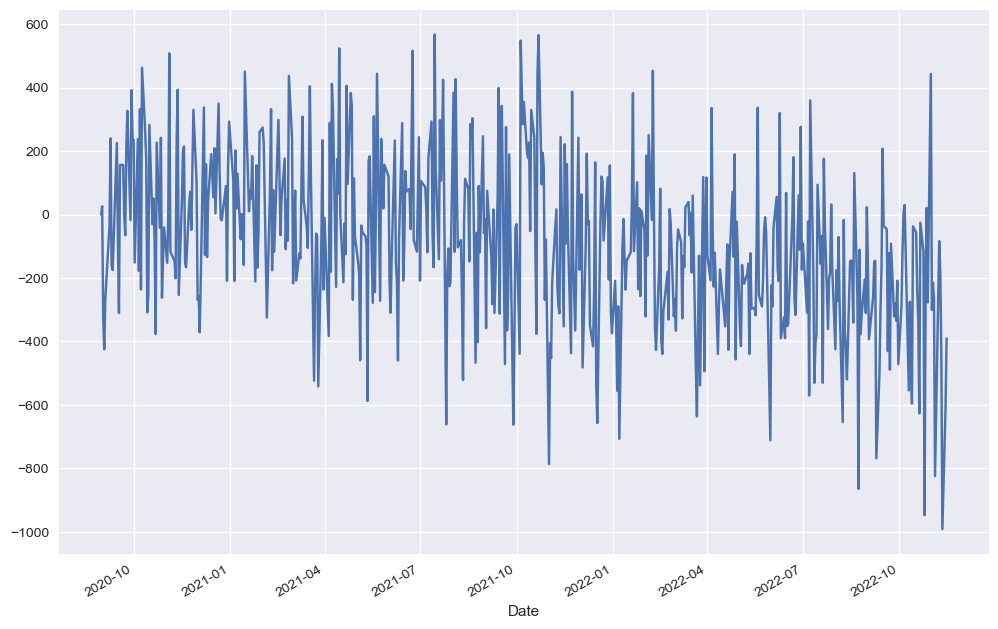

In [103]:
cf_daily.cumsum().plot(figsize = (12, 8))
plt.show()

-> potentially to be analyzed: margin requirements

## Trading Costs

In [108]:
tc = 1.1

In [110]:
trades

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-09-01,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.00
2020-09-02,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,-1.00,2.00
2020-09-03,0.00,0.00,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00
2020-09-04,-1.00,0.00,1.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,-1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-1.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,-1.00,0.00
2022-11-10,-1.00,1.00,0.00,0.00,0.00,-1.00,0.00,-1.00,-1.00,-1.00,...,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2022-11-11,1.00,-1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,...,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00


In [112]:
(trades != 0).sum(axis = 1) # traded symbols per day

(trades !=0).sum(axis=1)

Date
2020-08-31     0
2020-09-01     6
2020-09-02     8
2020-09-03    10
2020-09-04    10
              ..
2022-11-09     8
2022-11-10    10
2022-11-11    10
2022-11-14    10
2022-11-15     6
Length: 558, dtype: int64

In [114]:
daily_tc = (trades != 0).sum(axis = 1) * tc
daily_tc

Date
2020-08-31    0.00
2020-09-01    6.60
2020-09-02    8.80
2020-09-03   11.00
2020-09-04   11.00
              ... 
2022-11-09    8.80
2022-11-10   11.00
2022-11-11   11.00
2022-11-14   11.00
2022-11-15    6.60
Length: 558, dtype: float64

In [116]:
pandl.sum(axis = 1).sub(daily_tc).cumsum()
pandl.sum(axis=1).sub(daily_tc).cumsum()

Date
2020-08-31       0.00
2020-09-01      -6.60
2020-09-02      -9.15
2020-09-03     -40.38
2020-09-04     -60.20
               ...   
2022-11-09   -6230.91
2022-11-10   -6235.64
2022-11-11   -6268.55
2022-11-14   -6279.22
2022-11-15   -6274.20
Length: 558, dtype: float64

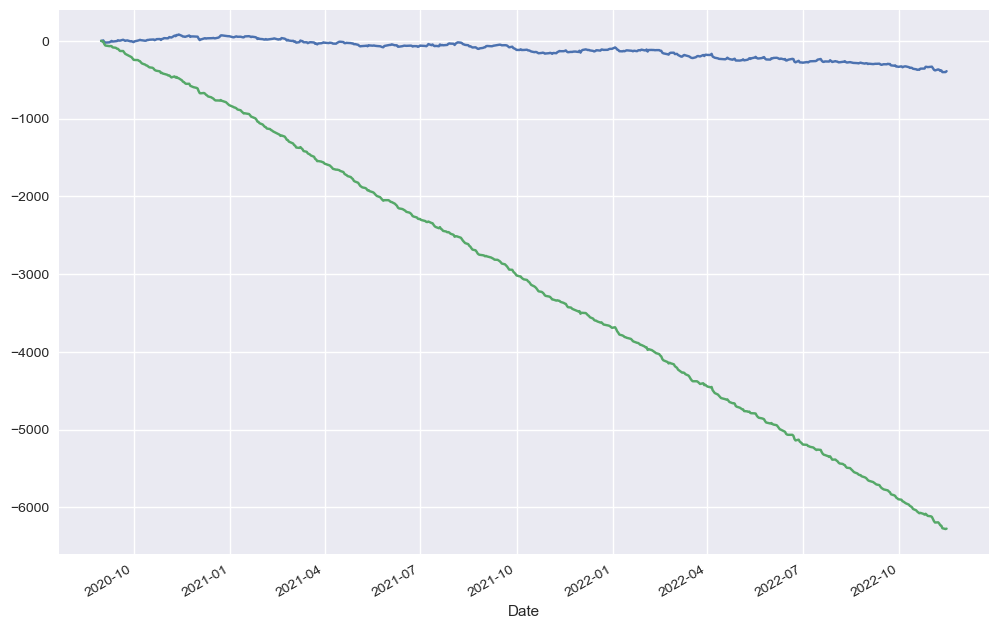

In [118]:
pandl.sum(axis = 1).cumsum().plot(figsize = (12, 8))
pandl.sum(axis = 1).sub(daily_tc).cumsum().plot()
plt.show()

- __huge impact__ of Trading Costs. 
- Buying/Selling only __1 share__ is __not cost efficient__

(ignored: short sale costs -> costs of borrowing)

## Bringing it all together

Strategy Parameters:
- Contrarian vs. Momentum
- Buying/Selling the best/worst [3] stocks
- equal amount of shares vs. equal trading value
- [1] share each (relative tc reduction)
- daily vs. weekly/monthly
- widen total set of stocks (e.g. 30 vs. 500)

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
url = "DJI_Const.csv"

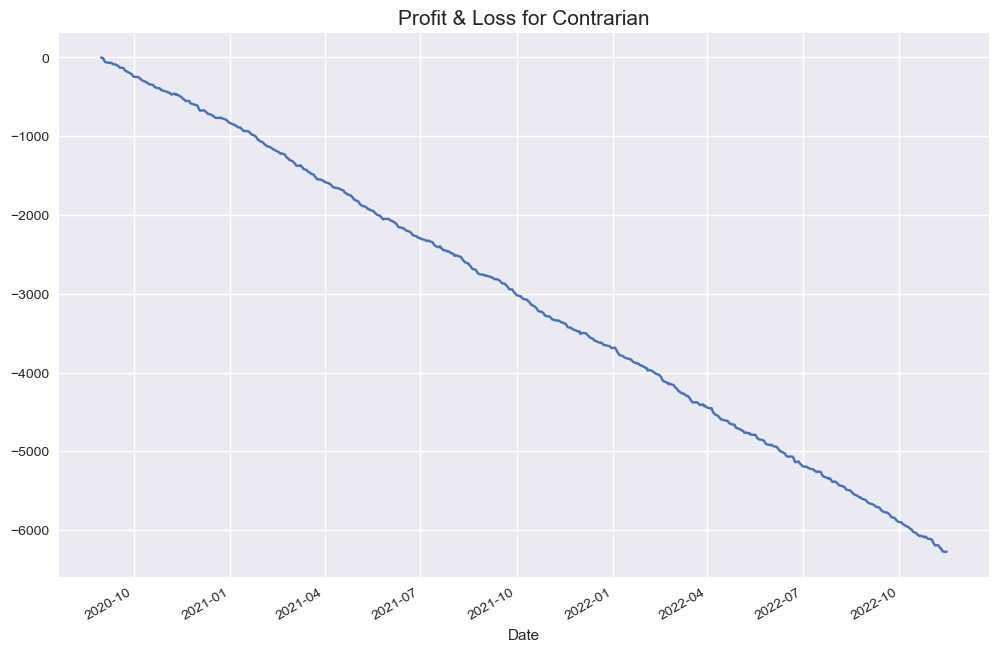

Date
2020-08-31       0.00
2020-09-01      -6.60
2020-09-02      -9.15
2020-09-03     -40.38
2020-09-04     -60.20
               ...   
2022-11-09   -6230.91
2022-11-10   -6235.64
2022-11-11   -6268.55
2022-11-14   -6279.22
2022-11-15   -6274.20
Length: 558, dtype: float64

In [151]:
class Mom_Contr_Backtester():
    
    def __init__(self, url, strategy = -1, best_worst = 3, shares = 1, tc = 1.1, resample = None):
        self.url = url
        self.strategy = strategy
        if strategy == -1:
            self.trend = "Contrarian"
        elif strategy == 1:
            self.trend = "Momentum"
        self.best_worst = best_worst
        self.shares = shares
        self.tc = tc
        self.resample = resample
        self.prepare_data()
    
    def prepare_data(self):
        close = pd.read_csv(url, header = [0,1], index_col = 0, parse_dates = [0]).Close
        close.drop(columns = ["^DJI"], inplace = True)
        if self.resample:
            close = close.resample(self.resample).last()
        self.close = close
        
        self.returns = close.pct_change()

    def _trading_positions(self, series):
        best_stocks = series.nlargest(self.best_worst).index #retrieves names of stock symbols
        worst_stocks = series.nsmallest(self.best_worst).index #retrieves names of stock symbols
        series[best_stocks] = self.strategy * self.shares # Short-Sell best stocks 
        series[worst_stocks] = -self.strategy * self.shares # Buy worst stocks
        no_trade = series.index.drop(best_stocks.append(worst_stocks)) #gets those stocks that are not traded
        series[no_trade] = 0 
    
    def get_positions_trades(self):
        positions = self.returns.copy()
        positions.apply(self._trading_positions, axis = 1) #does this row by row to the series
        positions.iloc[0] = 0
        positions.iloc[-1] = 0
        
        self.trades = positions.diff().fillna(0)
        self.positions = positions

    def performance_analysis(self):
        self.get_positions_trades()
        pandl = self.positions.shift() * self.close.diff()
        daily_tc = (self.trades != 0).sum(axis = 1) * self.tc
        self.pandl = pandl.sum(axis = 1).sub(daily_tc).cumsum()
        
        self.pandl.plot(figsize = (12, 8))
        plt.title("Profit & Loss for {}".format(self.trend), fontsize = 15)
        plt.show()


tester = Mom_Contr_Backtester(url, 
                              strategy = -1, 
                              best_worst = 3, 
                              shares = 1, 
                              tc = 1.1, 
                              resample = None
                             )
tester.performance_analysis()
tester.pandl

In [138]:
tester = Mom_Contr_Backtester(url, 
                              strategy = 1, 
                              best_worst = 3, 
                              shares = 50, 
                              tc = 2.2, 
                              resample = None
                             )




tester_best1 = Mom_Contr_Backtester(url, 
                              strategy = 1, 
                              best_worst = 1, 
                              shares = 50, 
                              tc = 2.2, 
                              resample = None
                             )


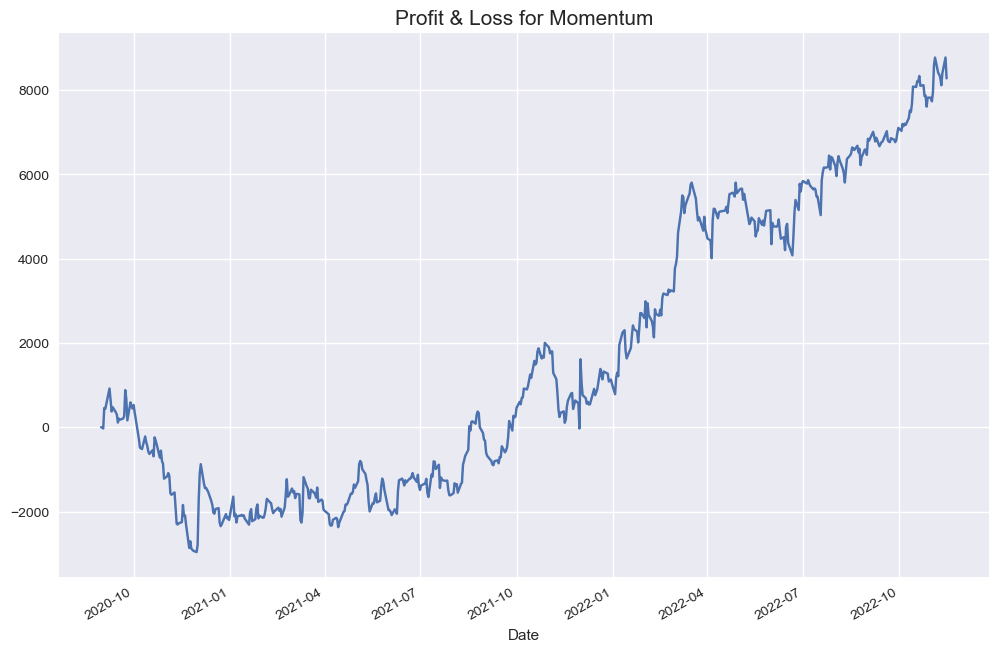

Date
2020-08-31      0.00
2020-09-01     -4.40
2020-09-02    -29.20
2020-09-03    456.90
2020-09-04    437.60
               ...  
2022-11-09   8297.60
2022-11-10   8118.30
2022-11-11   8405.50
2022-11-14   8777.20
2022-11-15   8282.80
Length: 558, dtype: float64

In [159]:

# Plot the performance of tester_best1 on the same axes
tester_best1.performance_analysis()

tester_best1.pandl


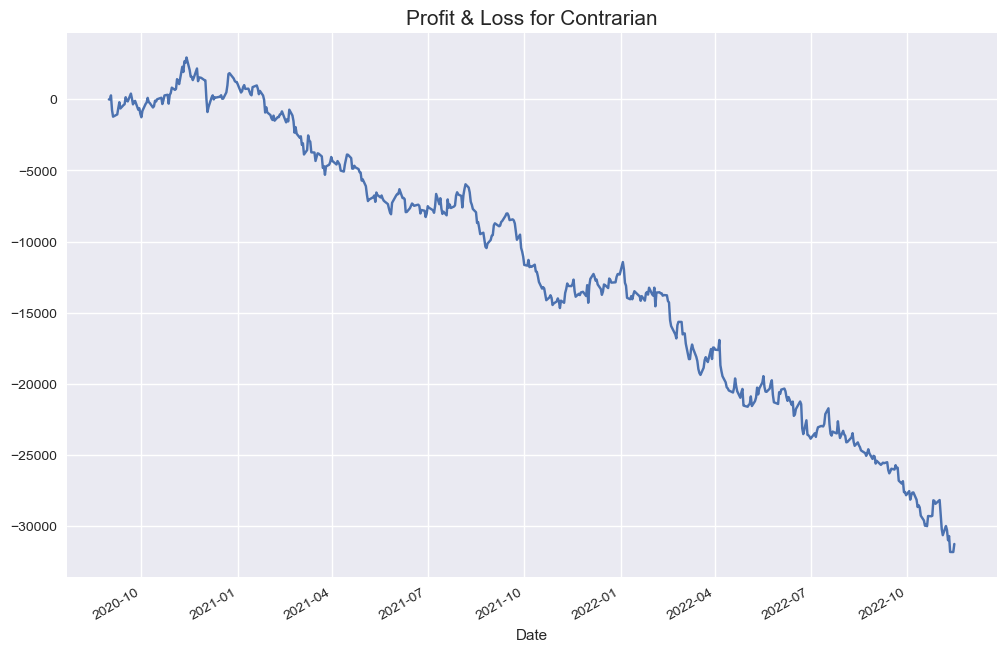

In [144]:
tester_contrarian = Mom_Contr_Backtester(url, 
                              strategy = -1, 
                              best_worst = 3, 
                              shares = 50, 
                              tc = 2.2, 
                              resample = None
                             )

tester_contrarian.performance_analysis()
